# Data Analysis Visualization

## General Plot

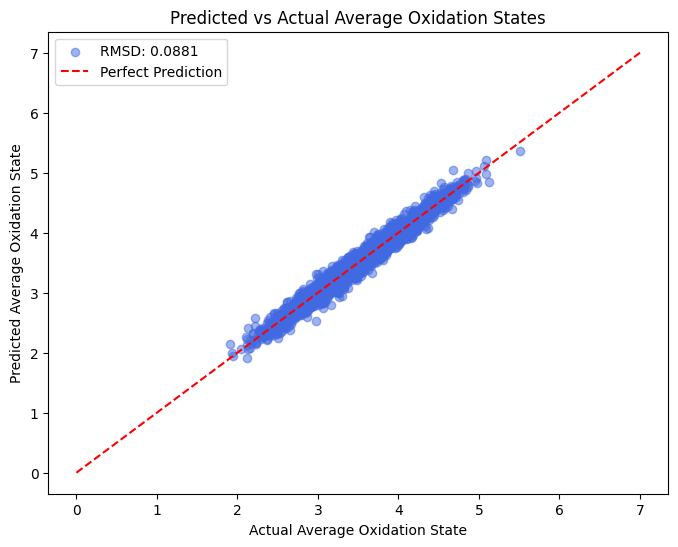

0.08814782921029311

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def plot_predicted_vs_actual(predicted_matrix, actual_matrix):
    """
    Plot predicted vs. actual average oxidation states and calculate RMSD.

    Parameters:
        predicted_matrix (numpy.ndarray): 4000x8 matrix of predicted normalized oxidation states (0-1).
        actual_matrix (numpy.ndarray): 4000x8 matrix of actual normalized oxidation states (0-1).
    Returns:
        float: RMSD (Root Mean Square Deviation) between predicted and actual oxidation states.
    """
    assert predicted_matrix.shape == actual_matrix.shape, "Predicted and actual matrices must have the same shape."
    assert predicted_matrix.shape[1] == 8, "Each matrix must have 8 columns for oxidation states."
    
    # Define the oxidation states: [0, 1, 2, ..., 7]
    oxidation_states = np.arange(8).reshape(-1, 1)  # Shape: (8, 1)
    
    # Compute the average oxidation states for each sample
    predicted_avg = np.dot(predicted_matrix, oxidation_states).flatten()  # Shape: (4000,)
    actual_avg = np.dot(actual_matrix, oxidation_states).flatten()        # Shape: (4000,)
    
    # Calculate RMSD
    rmsd = np.sqrt(mean_squared_error(actual_avg, predicted_avg))
    
    # Plot predicted vs. actual
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_avg, predicted_avg, alpha=0.5, label=f'RMSD: {rmsd:.4f}', color='royalblue')
    plt.plot([0, 7], [0, 7], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Ground Truth Oxidation State')
    plt.ylabel('Predicted Average Oxidation State')
    plt.title('Predicted vs Ground Truth Oxidation States')
    plt.legend()
    plt.show()
    
    return rmsd


## Error Histogram 

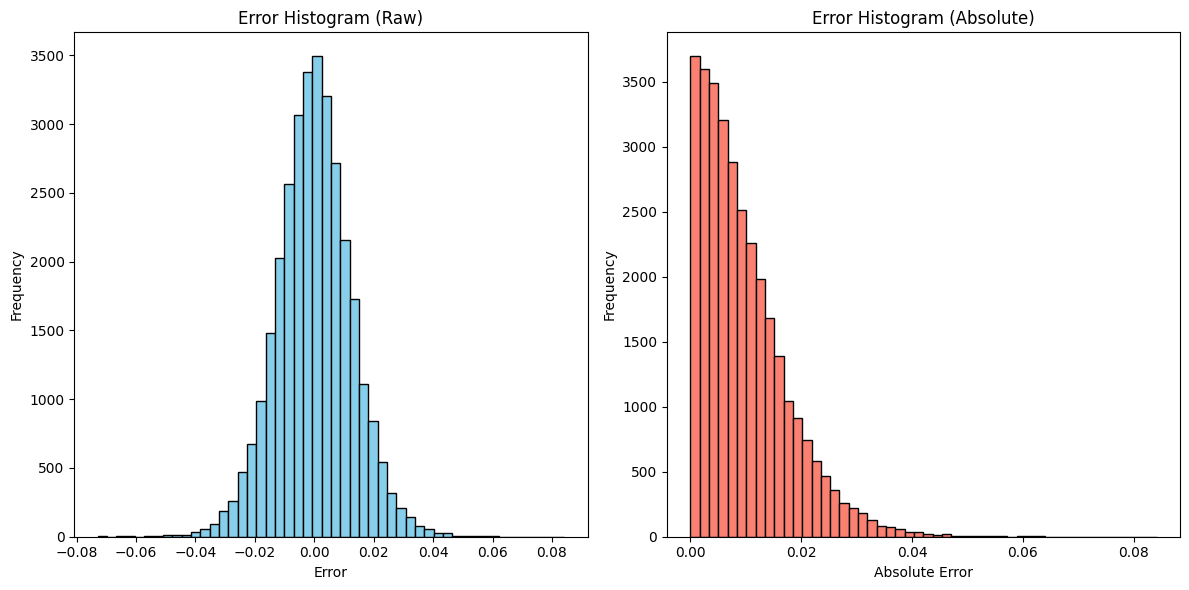

In [13]:
def plot_error_histogram(predicted_matrix, actual_matrix, bins=50):
    """
    Plot a histogram of the errors between predicted and actual matrices.

    Parameters:
        predicted_matrix (numpy.ndarray): Predicted values (4000x8).
        actual_matrix (numpy.ndarray): Actual values (4000x8).
        bins (int): Number of bins for the histogram.
    """
    # Calculate the element-wise error
    error = predicted_matrix - actual_matrix  # Raw error
    absolute_error = np.abs(error)            # Absolute error
    
    # Flatten the error matrices for histogram plotting
    raw_error_flat = error.flatten()
    abs_error_flat = absolute_error.flatten()

    # Plot the raw error histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # First subplot for raw errors
    plt.hist(raw_error_flat, bins=bins, color='skyblue', edgecolor='black')
    plt.title('Error Histogram (Raw)')
    plt.xlabel('Error')
    plt.ylabel('Frequency')

    # Plot the absolute error histogram
    plt.subplot(1, 2, 2)  # Second subplot for absolute errors
    plt.hist(abs_error_flat, bins=bins, color='salmon', edgecolor='black')
    plt.title('Error Histogram (Absolute)')
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
    return 

# Example input matrices (normalized)
np.random.seed(42)
actual_matrix = np.random.rand(4000, 8)
predicted_matrix = actual_matrix + np.random.normal(0, 0.05, size=(4000, 8))
predicted_matrix = np.clip(predicted_matrix, 0, 1)

# Normalize rows to sum to 1
actual_matrix /= actual_matrix.sum(axis=1, keepdims=True)
predicted_matrix /= predicted_matrix.sum(axis=1, keepdims=True)

# Call the function
plot_error_histogram(predicted_matrix, actual_matrix)